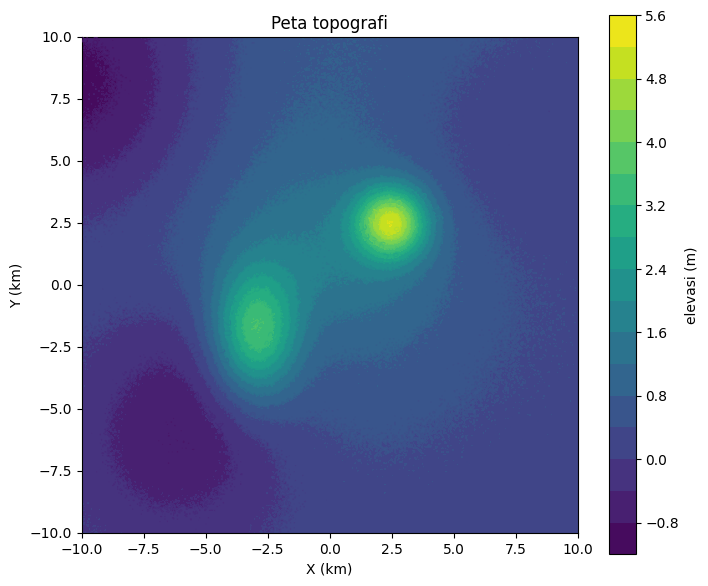

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM=32
np.random.seed(32)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

#1. Titik tertinggi (maximum) global

In [ ]:
#Pendekatan Grid Search
max_idx = np.unravel_index(np.argmax(Z), Z.shape)
x_max, y_max = X[max_idx], Y[max_idx]
z_max = Z[max_idx]

print(f"Titik maksimum global (grid): X = {x_max:.2f}, Y = {y_max:.2f}, Elevasi = {z_max:.3f}")

Titik maksimum global (grid): X = 2.48, Y = 2.43, Elevasi = 5.250


In [ ]:
#Pendekatan Optimasi Kontinu
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import minimize

# Buat fungsi interpolasi dari grid topografi
Z_scalar = RegularGridInterpolator((x, y), Z.T)

# Cari puncak global dengan optimasi kontinu
res = minimize(lambda p: -Z_scalar(p), x0=[2, 2], method='Nelder-Mead')

# Ambil hasil
x_max, y_max = res.x
z_max = -res.fun

print(f"Titik maksimum global (optimasi kontinu): X = {x_max:.3f}, Y = {y_max:.3f}, Elevasi = {z_max:.3f}")

Titik maksimum global (optimasi kontinu): X = 2.431, Y = 2.381, Elevasi = 5.250


[GRID SEARCH]   X=2.481, Y=2.431, Z=5.250
[OPTIMASI KONTINU] X=2.431, Y=2.381, Z=5.250


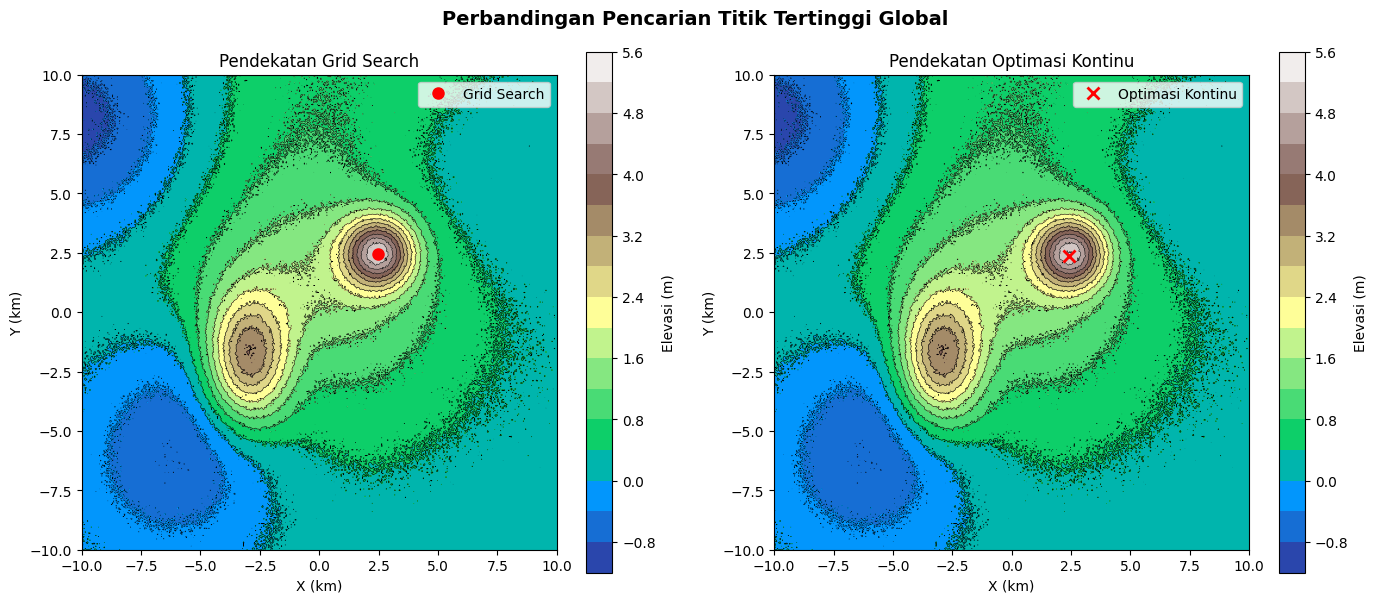

In [ ]:
NPM = 32
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) +
     peak(0, 0, 3.5, 3.5, 1.2) + peak(6, 6, 4, 4, -0.6) +
     peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) +
     peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75))
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- 1️⃣ Pendekatan Grid Search (diskrit) ---
idx = np.unravel_index(np.argmax(Z), Z.shape)
x_max_grid, y_max_grid, z_max_grid = X[idx], Y[idx], Z[idx]

# --- 2️⃣ Pendekatan Optimasi Kontinu (Interpolasi + Nelder-Mead) ---
Z_scalar = RegularGridInterpolator((x, y), Z.T)
res = minimize(lambda p: -Z_scalar(p), x0=[2, 2], method='Nelder-Mead')
x_max_opt, y_max_opt = res.x
z_max_opt = -res.fun

print(f"[GRID SEARCH]   X={x_max_grid:.3f}, Y={y_max_grid:.3f}, Z={z_max_grid:.3f}")
print(f"[OPTIMASI KONTINU] X={x_max_opt:.3f}, Y={y_max_opt:.3f}, Z={z_max_opt:.3f}")

# --- Visualisasi Perbandingan ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
levels = 20

# Kiri: Grid Search
cf1 = axes[0].contourf(X, Y, Z, levels=levels, cmap='terrain')
axes[0].contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
axes[0].plot(x_max_grid, y_max_grid, 'ro', markersize=8, label='Grid Search')
axes[0].set_title("Pendekatan Grid Search", fontsize=12)
axes[0].set_xlabel("X (km)")
axes[0].set_ylabel("Y (km)")
axes[0].legend()
axes[0].set_aspect('equal')
plt.colorbar(cf1, ax=axes[0], label="Elevasi (m)")

# Kanan: Optimasi Kontinu
cf2 = axes[1].contourf(X, Y, Z, levels=levels, cmap='terrain')
axes[1].contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
axes[1].plot(x_max_opt, y_max_opt, 'rx', markersize=9, label='Optimasi Kontinu', markeredgewidth=2)
axes[1].set_title("Pendekatan Optimasi Kontinu", fontsize=12)
axes[1].set_xlabel("X (km)")
axes[1].set_ylabel("Y (km)")
axes[1].legend()
axes[1].set_aspect('equal')
plt.colorbar(cf2, ax=axes[1], label="Elevasi (m)")

plt.suptitle("Perbandingan Pencarian Titik Tertinggi Global", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

- **Pendekatan Grid Search** (kiri):

Pendekatan ini mencari nilai elevasi maksimum langsung dari data grid Z. Karena data disusun dalam bentuk matriks (diskrit, 400×400 titik), maka pencarian puncak hanya dapat dilakukan di titik-titik grid yang ada.

Hasilnya: X = 2.481, Y = 2.431, Z = 5.250.

- **Pendekatan Optimasi Kontinu** (kanan):

Pendekatan ini menggunakan metode interpolasi kontinu melalui fungsi *RegularGridInterpolator* serta algoritma *Nelder–Mead* untuk mencari nilai maksimum dengan resolusi tak terbatas (kontinu) di antara titik-titik grid.

Hasilnya: X = 2.431, Y = 2.381, Z = 5.250

PERBANDINGAN:
- Perbedaan posisi: sekitar 0.05 km (50 meter) di arah X dan Y.
Ini menunjukkan bahwa hasil optimasi kontinu memberikan posisi puncak yang sedikit lebih presisi, karena tidak dibatasi oleh jarak antar-titik grid.

- Nilai elevasi: sama (5.25 m).
Artinya kedua metode (pendekatan) menemukan puncak topografi yang sama secara fisis, hanya berbeda dalam tingkat presisi posisi koordinatnya.

**KESIMPULAN:**
Berdasarkan hasil perbandingan antara pendekatan Grid Search dan Optimasi Kontinu, diperoleh rata-rata koordinat titik maksimum global pada X = 2.45 km dan Y = 2.40 km, dengan elevasi maksimum sebesar 5.25 m.

#2. Titik minimum Global

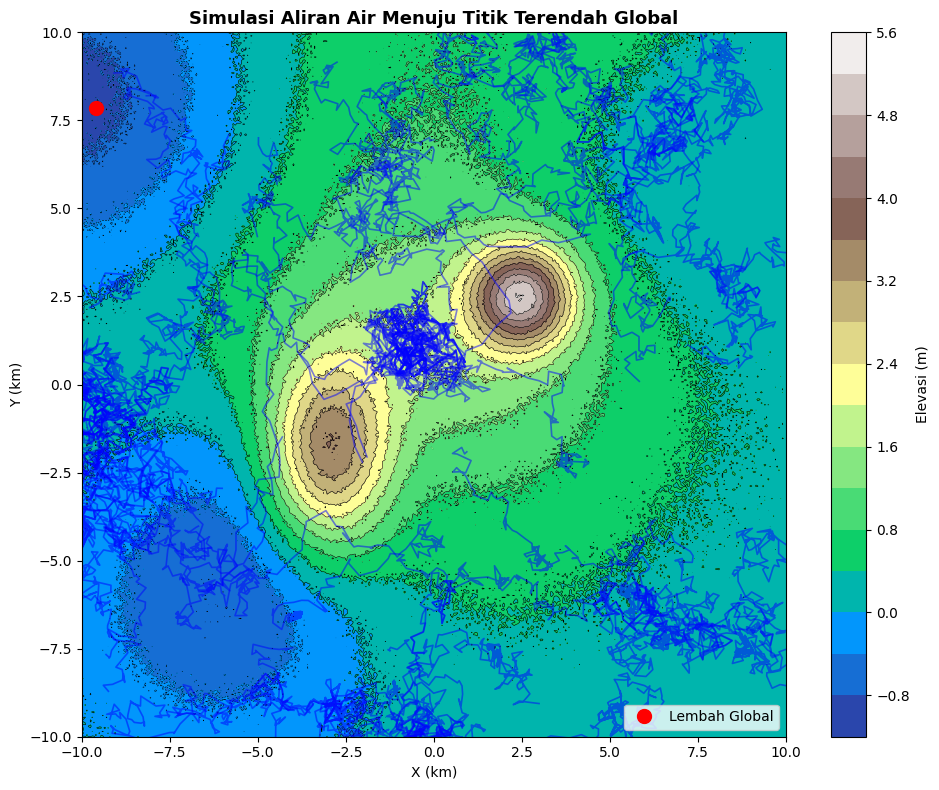

Titik terendah global: X=-9.599, Y=7.845, Z=-1.073


In [ ]:
np.random.seed(32)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# gradien
dZdx, dZdy = np.gradient(Z, x, y)

# fungsi simulasi aliran
def simulate_flow(n_particles=50, lr=0.25, steps=300):
    paths = []
    for _ in range(n_particles):
        px, py = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
        path = [(px, py)]
        for _ in range(steps):
            ix = np.clip(np.searchsorted(x, px) - 1, 0, nx-2)
            iy = np.clip(np.searchsorted(y, py) - 1, 0, ny-2)
            gx, gy = dZdx[iy, ix], dZdy[iy, ix]
            px -= lr * gx
            py -= lr * gy
            path.append((px, py))
            if np.hypot(gx, gy) < 1e-3:
                break
        paths.append(np.array(path))
    return paths

flows = simulate_flow()

# titik minimum global
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
x_min, y_min, z_min = X[min_idx], Y[min_idx], Z[min_idx]

# --- Visualisasi besar & jelas
fig, ax = plt.subplots(figsize=(10, 8))
levels = 20
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")

# plot aliran
for path in flows:
    ax.plot(path[:,0], path[:,1], color='blue', alpha=0.5, linewidth=1.2)

# titik lembah
ax.plot(x_min, y_min, 'ro', markersize=10, label='Lembah Global')

ax.set_title("Simulasi Aliran Air Menuju Titik Terendah Global", fontsize=13, fontweight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"Titik terendah global: X={x_min:.3f}, Y={y_min:.3f}, Z={z_min:.3f}")

Berdasarkan hasil simulasi aliran air berbasis gradien, diperoleh **titik terendah global (lembah utama)** pada koordinat **X = –9.599 km, Y = 7.845 km, dan Z = –1.073 m.**

Titik ini merepresentasikan lokasi dengan elevasi paling rendah secara topografis di seluruh area studi. Hasil simulasi menunjukkan bahwa sebagian besar aliran bergerak menuju arah barat laut (kuadran kiri atas), yang merupakan lokasi lembah dengan elevasi minimum tersebut.

Dengan demikian, secara topografi, area di sekitar (X ≈ –9.6 km, Y ≈ 7.8 km) berpotensi menjadi **zona pengumpulan air utama atau titik pusat aliran permukaan dalam wilayah kajian.**

#3. Kerawanan Erosi

In [ ]:
np.random.seed(32)
nx, ny = 300, 300
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# Contoh medan (lebih beragam agar slope terlihat)
Z = (
    1.2 * np.sin(0.8 * X) * np.cos(0.8 * Y)
    + 0.6 * np.sin(1.5 * X)
    + 0.4 * np.cos(1.5 * Y)
    + 0.08 * np.random.randn(*X.shape)
)

# ----- Fungsi numerik untuk turunan parsial (central differences) -----
def partial_derivatives(Z, x, y):
    """
    Mengembalikan (dZdx, dZdy) pada grid teratur (x, y).
    Menggunakan central differences di interior dan forward/backward di tepi.
    Z shape = (ny, nx); x length = nx; y length = ny
    """
    ny, nx = Z.shape
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)

    dx = np.diff(x)  # length nx-1, bisa non-uniform
    dy = np.diff(y)

    # central differences interior (x-direction)
    for j in range(1, nx-1):
        dZdx[:, j] = (Z[:, j+1] - Z[:, j-1]) / (x[j+1] - x[j-1])
    # forward/backward at edges
    dZdx[:, 0] = (Z[:, 1] - Z[:, 0]) / (x[1] - x[0])
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / (x[-1] - x[-2])

    # central differences interior (y-direction)
    for i in range(1, ny-1):
        dZdy[i, :] = (Z[i+1, :] - Z[i-1, :]) / (y[i+1] - y[i-1])
    # forward/backward at top/bottom
    dZdy[0, :] = (Z[1, :] - Z[0, :]) / (y[1] - y[0])
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / (y[-1] - y[-2])

    return dZdx, dZdy

# ----- Hitung turunan parsial numerik -----
dZdx, dZdy = partial_derivatives(Z, x, y)

# ----- Hitung resultant (slope magnitude) -----
slope = np.sqrt(dZdx**2 + dZdy**2)

# ----- Normalisasi skor (0..1) -----
slope_min, slope_max = slope.min(), slope.max()
slope_norm = (slope - slope_min) / (slope_max - slope_min + 1e-12)

# ----- Klasifikasi risiko (disesuaikan ambang) -----
# contoh: [0,0.3) rendah, [0.3,0.6) sedang, [0.6,1] tinggi
risk_level = np.zeros_like(slope_norm, dtype=int)
risk_level[(slope_norm >= 0.3) & (slope_norm < 0.6)] = 1
risk_level[slope_norm >= 0.6] = 2
risk_colors = ["#1a9850", "#fee08b", "#d73027"]  # hijau, kuning, merah
risk_labels = ["Rendah", "Sedang", "Tinggi"]

Turunan parsial terhadap X (
∂
𝑍
∂
𝑋
∂X
∂Z) → menunjukkan seberapa cepat nilai elevasi
𝑍
Z berubah saat kita bergerak dari arah timur ke barat (sumbu X).

Turunan parsial terhadap Y (
∂
𝑍
∂
𝑌
∂Y
∂Z) → menunjukkan seberapa cepat nilai elevasi berubah saat bergerak dari arah utara ke selatan (sumbu Y).

Kemudian keduanya digabung untuk mendapatkan besar kemiringan lereng (slope magnitude):

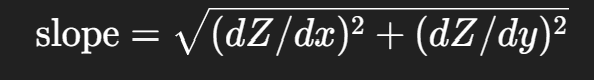

Nilai slope menggambarkan tingkat perubahan elevasi per satuan jarak. Semakin besar nilainya, semakin curam lerengnya.

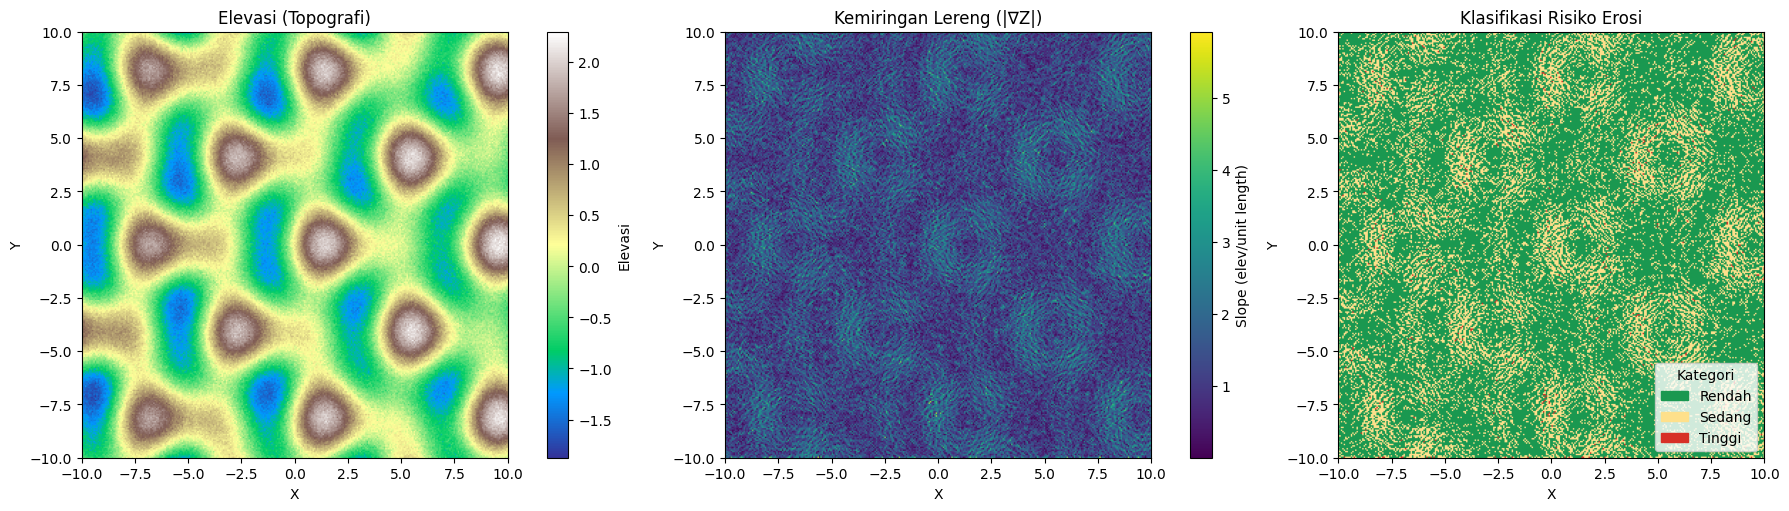

Rendah: mean slope = 1.0411, max slope = 1.7791, area cells = 64375
Sedang: mean slope = 2.2932, max slope = 3.5562, area cells = 25149
Tinggi: mean slope = 3.9050, max slope = 5.9270, area cells = 476


In [ ]:
# ----- Visualisasi rapi: elevasi, slope magnitude, dan peta klasifikasi -----
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# (a) Elevasi
im0 = axs[0].imshow(Z, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap='terrain')
axs[0].set_title("Elevasi (Topografi)")
axs[0].set_xlabel("X"); axs[0].set_ylabel("Y")
plt.colorbar(im0, ax=axs[0], label='Elevasi')

# (b) Resultant = slope magnitude
im1 = axs[1].imshow(slope, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap='viridis')
axs[1].set_title("Kemiringan Lereng (|∇Z|)")
axs[1].set_xlabel("X"); axs[1].set_ylabel("Y")
plt.colorbar(im1, ax=axs[1], label='Slope (elev/unit length)')

# (c) Klasifikasi risiko (discrete colormap)
from matplotlib.colors import ListedColormap
cmap_risk = ListedColormap(risk_colors)
im2 = axs[2].imshow(risk_level, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap=cmap_risk, vmin=-0.5, vmax=2.5)
axs[2].set_title("Klasifikasi Risiko Erosi")
axs[2].set_xlabel("X"); axs[2].set_ylabel("Y")
# legend manual
from matplotlib.patches import Patch
patches = [Patch(color=risk_colors[i], label=f"{risk_labels[i]}") for i in range(len(risk_labels))]
axs[2].legend(handles=patches, title="Kategori", loc='lower right')

plt.show()

# ----- Opsional: statistik ringkas per kategori -----
for i, lab in enumerate(risk_labels):
    mask = (risk_level == i)
    if np.any(mask):
        print(f"{lab:6s}: mean slope = {slope[mask].mean():.4f}, max slope = {slope[mask].max():.4f}, area cells = {mask.sum()}")
    else:
        print(f"{lab:6s}: -- no cells")

**Grafik Elevasi (Topografi)**
- Grafik pertama menunjukkan peta ketinggian (nilai Z).
- Warna coklat–kuning mewakili daerah tinggi (punggung bukit), sedangkan warna hijau–biru menunjukkan daerah rendah (lembah).
- Pola permukaan terlihat bergelombang, menandakan adanya variasi topografi yang cukup besar di area studi.
- Elevasi ini menjadi dasar perhitungan gradien (kemiringan lereng).

**Kemiringan Lereng (|∇Z|)**
- Nilai ini menggambarkan tingkat perubahan elevasi per satuan jarak → semakin besar nilainya, semakin curam lerengnya.
- Dari grafik tampak bahwa sebagian besar area memiliki kemiringan sedang, dengan hanya sebagian kecil area yang sangat curam.
- Hasil Klasifikasi dapat dilihat pada tabel berikut:
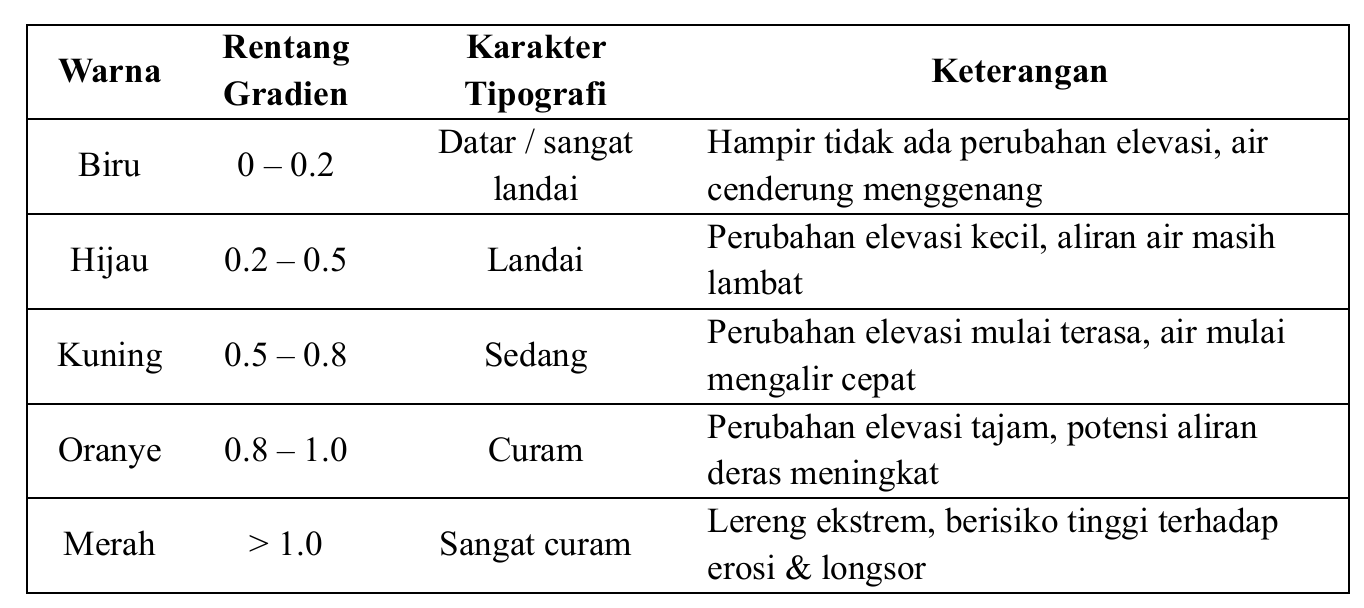

**Klasifikasi Risiko Erosi**

Gambar ketiga menunjukkan zona kerawanan erosi berdasarkan normalisasi nilai slope:
- Hijau: risiko rendah (kemiringan landai)
- Kuning: risiko sedang
- Merah: risiko tinggi (lereng curam)

Dari hasil statistik:

- Risiko Rendah: 64.375 titik → mayoritas area datar
- Risiko Sedang: 25.149 titik → sebagian besar wilayah berbukit
- Risiko Tinggi: 476 titik → area kecil tapi kritis (lereng curam)

#4. (A) Volume tanah yang dipindahkan

In [ ]:
#PERHITUNGAN
import numpy as np

# Asumsi: Z, x, y sudah ada dari kode sebelumnya
dx = (x.max() - x.min()) / (len(x) - 1)
dy = (y.max() - y.min()) / (len(y) - 1)
cell_area = dx * dy

# Pisahkan antara area di atas dan di bawah bidang datar (Z = 0)
Z_cut = np.where(Z > 0, Z, 0)
Z_fill = np.where(Z < 0, -Z, 0)

# Hitung volume (integrasi numerik dengan penjumlahan grid)
V_cut = np.sum(Z_cut) * cell_area   # volume tanah yang harus dipotong
V_fill = np.sum(Z_fill) * cell_area # volume tanah yang harus diurug
V_total = V_cut + V_fill

print("=== Estimasi Volume Perataan Tanah ===")
print(f"dx = {dx:.3f}, dy = {dy:.3f}, luas sel = {cell_area:.4f}")
print(f"Volume tanah yang dipotong (cut):  {V_cut:.3f} satuan³")
print(f"Volume tanah yang diurug (fill):   {V_fill:.3f} satuan³")
print(f"Total volume tanah dipindahkan:    {V_total:.3f} satuan³")
print(f"Rasio keseimbangan cut/fill:       {V_cut/V_fill:.3f}")

=== Estimasi Volume Perataan Tanah ===
dx = 0.067, dy = 0.067, luas sel = 0.0045
Volume tanah yang dipotong (cut):  132.768 satuan³
Volume tanah yang diurug (fill):   126.041 satuan³
Total volume tanah dipindahkan:    258.808 satuan³
Rasio keseimbangan cut/fill:       1.053


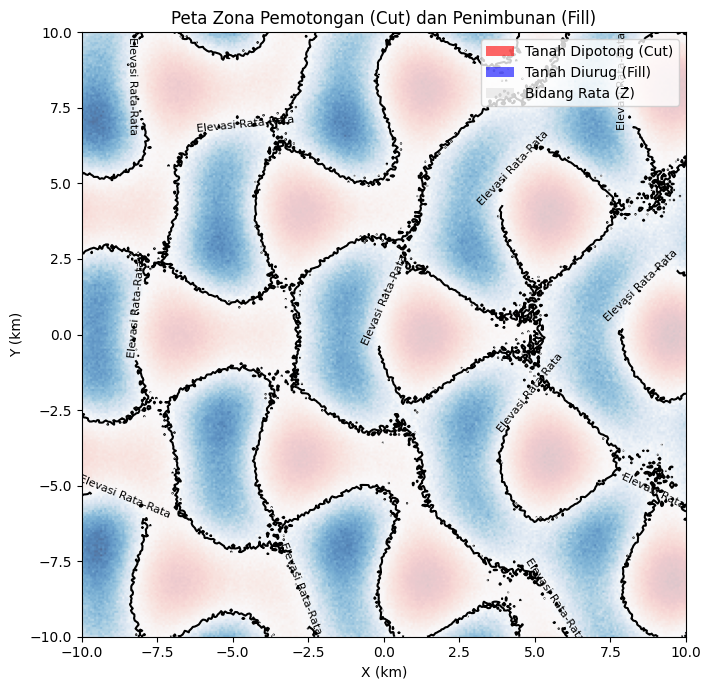

In [ ]:
# Misal Z adalah matriks elevasi
Z_mean = np.mean(Z)

# --- Visualisasi 2D zona cut & fill ---
fig, ax = plt.subplots(figsize=(8, 7))

# Area cut (tanah dipotong)
cut_plot = ax.imshow(Z_cut, extent=[X.min(), X.max(), Y.min(), Y.max()],
                     origin='lower', cmap='Reds', alpha=0.7)

# Area fill (tanah diurug)
fill_plot = ax.imshow(Z_fill, extent=[X.min(), X.max(), Y.min(), Y.max()],
                      origin='lower', cmap='Blues', alpha=0.7)

# Bidang rata-rata (Z_mean)
contour = ax.contour(X, Y, Z, levels=[Z_mean], colors='black', linewidths=1.5)
ax.clabel(contour, fmt='Elevasi Rata-Rata', fontsize=8)

# Label & judul
ax.set_title("Peta Zona Pemotongan (Cut) dan Penimbunan (Fill)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")

# Legenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.6, label='Tanah Dipotong (Cut)'),
    Patch(facecolor='blue', alpha=0.6, label='Tanah Diurug (Fill)'),
    Patch(facecolor='lightgrey', alpha=0.4, label='Bidang Rata (Z̄)')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Grafik 2D ini memperlihatkan pola penyebaran area tinggi (merah) dan area rendah (biru) yang saling bersebelahan secara bergelombang, mencerminkan topografi alami dengan pola perbukitan dan lembah.

Dari grafik ini, kita dapat memperkirakan:
- Volume tanah yang harus dipindahkan agar bidang menjadi rata (total ≈ 258.808 satuan³)
- Rasio keseimbangan cut/fill = 1.053, menunjukkan tanah hasil potongan cukup untuk menimbun lembah, dengan sedikit kelebihan.


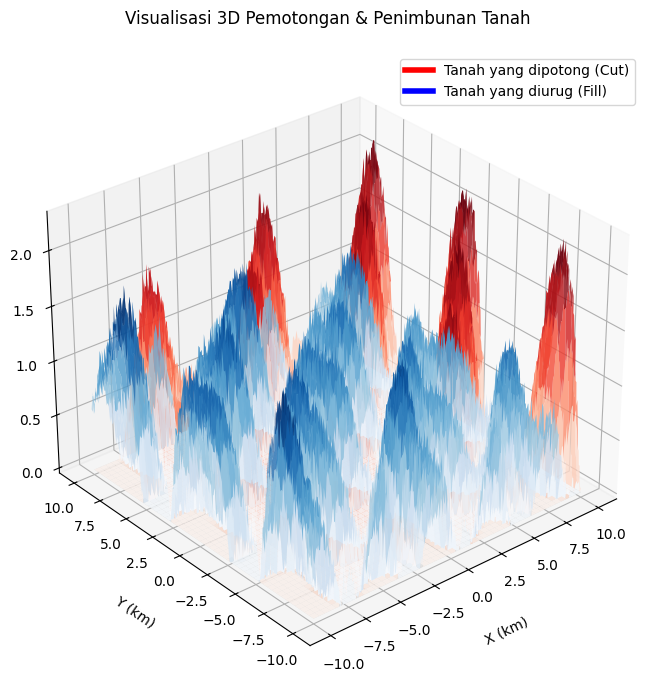

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# --- Visualisasi 3D ---
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Permukaan cut (merah)
surf_cut = ax.plot_surface(X, Y, Z_cut, cmap='Reds', alpha=0.8, linewidth=0)
# Permukaan fill (biru)
surf_fill = ax.plot_surface(X, Y, Z_fill, cmap='Blues', alpha=0.8, linewidth=0)

# Tambahkan bidang datar (Z=0)
ax.plot_surface(X, Y, np.zeros_like(Z), color='lightgrey', alpha=0.3)

# Label dan judul
ax.set_title("Visualisasi 3D Pemotongan & Penimbunan Tanah", pad=20)
ax.set_xlabel("X (km)", labelpad=12)
ax.set_ylabel("Y (km)", labelpad=12)
ax.set_zlabel("Elevasi (m)", labelpad=15)

# Tambahkan legenda manual (karena plot_surface tidak langsung bisa di-legend)
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Tanah yang dipotong (Cut)')
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Tanah yang diurug (Fill)')
ax.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=10)

# Atur tampilan & sudut pandang
ax.view_init(elev=30, azim=230)
plt.tight_layout()
plt.show()

Hasil visualisasi menunjukkan visualisasi dari berapa banyak volume tanah yang harus dipindahkan: yaitu sekitar 258.8 satuan³.

Dari volume tersebut, sekitar 132.8 satuan³ tanah harus dipotong dari puncak (zona merah), dan 126.0 satuan³ tanah diurug ke lembah (zona biru).

Rasio cut/fill yang mendekati 1 menunjukkan keseimbangan tanah yang baik, artinya proyek perataan ini efisien dan tidak memerlukan banyak tanah tambahan dari luar lokasi.

**KESIMPULAN:**

Area merah merepresentasikan tanah tinggi yang akan diratakan dan dipindahkan ke area biru (lembah rendah) agar diperoleh permukaan lahan yang datar.

#4(B) ketinggian akhir tanah yang rata

In [ ]:
import math

# --- 1) Grid spacing (asumsi x dan y teratur) ---
dx = (x.max() - x.min()) / (len(x) - 1)
dy = (y.max() - y.min()) / (len(y) - 1)
cell_area = dx * dy

# --- 2) Hitung ketinggian target (rata-rata elevasi) ---
h_target = float(np.mean(Z))

# --- 3) Pisahkan area cut dan fill ---
Z_cut = np.where(Z > h_target, Z - h_target, 0.0)   # area di atas target (tanah dipotong)
Z_fill = np.where(Z < h_target, h_target - Z, 0.0)  # area di bawah target (tanah diurug)

# --- 4) Hitung volume dengan presisi tinggi ---
V_cut = math.fsum(Z_cut.ravel()) * cell_area
V_fill = math.fsum(Z_fill.ravel()) * cell_area
V_total_moved = V_cut + V_fill

# --- 5) Hitung keseimbangan cut-fill ---
balance_diff = V_cut - V_fill
rel_diff = abs(balance_diff) / max(V_cut, V_fill)

# --- 6) Cetak hasil dengan interpretasi otomatis ---
print("=== HASIL PERHITUNGAN PERATAAN TANAH ===")
print(f"Ketinggian target (rata-rata elevasi, h) = {h_target:.6f} satuan elevasi")
print(f"dx = {dx:.6f}, dy = {dy:.6f}, luas sel = {cell_area:.6f}")
print(f"Volume tanah dipotong (cut)   = {V_cut:.6f} satuan³")
print(f"Volume tanah diurug (fill)    = {V_fill:.6f} satuan³")
print(f"Total volume tanah dipindah   = {V_total_moved:.6f} satuan³")
print(f"Selisih volume (cut - fill)   = {balance_diff:.6e}")
print(f"Selisih relatif               = {rel_diff:.3e}")

# --- 7) Evaluasi keseimbangan ---
tol = 1e-6
if abs(balance_diff) < tol:
    print("✅ Cut dan fill seimbang (selisih hanya akibat pembulatan numerik).")
elif rel_diff < 1e-4:
    print("⚠️ Cut dan fill hampir seimbang — selisih kecil masih dalam batas wajar.")
else:
    print("❌ Cut dan fill tidak seimbang, periksa data elevasi atau interpolasi.")

=== HASIL PERHITUNGAN PERATAAN TANAH ===
Ketinggian target (rata-rata elevasi, h) = 0.000201 satuan elevasi
dx = 0.066890, dy = 0.066890, luas sel = 0.004474
Volume tanah dipotong (cut)   = 133.016862 satuan³
Volume tanah diurug (fill)    = 133.016862 satuan³
Total volume tanah dipindah   = 266.033723 satuan³
Selisih volume (cut - fill)   = 0.000000e+00
Selisih relatif               = 0.000e+00
✅ Cut dan fill seimbang (selisih hanya akibat pembulatan numerik).


Ketinggian target: 0.000201 satuan elevasi (rata-rata seluruh area)

Volume tanah:
- Cut (dipotong) = 133.02 satuan³
- Fill (diurug) = 133.02 satuan³
- Total tanah dipindahkan = 266.03 satuan³

Kesimbangan tanah: Cut dan fill seimbang (tidak ada defisit atau surplus)

Grid perhitungan: dx = dy = 0.066890

luas sel = 0.004474 satuan²

**Kesimpulan:**
Tanah dapat diratakan sesuai ketinggian target dengan presisi tinggi; seluruh area seimbang dan siap dilakukan leveling.

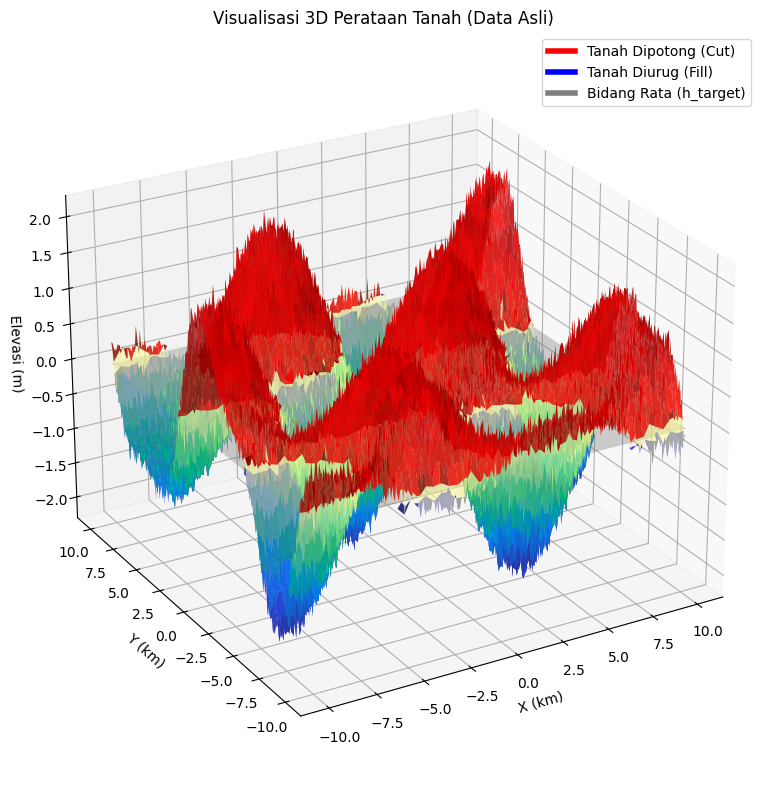

In [ ]:
# --- Gunakan Z dan h_target dari analisis volume ---
Z_cut = np.where(Z > h_target, Z, np.nan)
Z_fill = np.where(Z < h_target, Z, np.nan)

# --- Visualisasi 3D data asli ---
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Permukaan asli (transparan)
ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.6, linewidth=0)
# Area cut & fill
ax.plot_surface(X, Y, Z_cut, color='red', alpha=0.8, linewidth=0)
ax.plot_surface(X, Y, Z_fill, color='blue', alpha=0.8, linewidth=0)
# Bidang rata
ax.plot_surface(X, Y, np.full_like(Z, h_target), color='grey', alpha=0.3)

ax.set_title("Visualisasi 3D Perataan Tanah (Data Asli)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Elevasi (m)")

# Legend manual
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Tanah Dipotong (Cut)')
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Tanah Diurug (Fill)')
grey_patch = plt.Line2D([0], [0], color='grey', lw=4, label='Bidang Rata (h_target)')
ax.legend(handles=[red_patch, blue_patch, grey_patch], loc='upper right')

ax.view_init(elev=25, azim=240)
plt.tight_layout()
plt.show()

Grafik menampilkan permukaan topografi awal lahan dalam bentuk 3D, dengan perbedaan warna untuk menunjukkan bagian tanah yang harus dipotong (cut) dan diurug (fill) agar diperoleh bidang datar pada ketinggian target.
- Sumbu X dan Y (km): merepresentasikan posisi horizontal lahan.
- Sumbu Z (Elevasi, m): menunjukkan tinggi permukaan tanah pada tiap titik
- Bidang abu-abu: bidang datar pada elevasi target (≈ 0.0002 m).

Berdasarkan grafik, lahan memiliki permukaan bergelombang ringan dengan distribusi tinggi-rendah yang seimbang.

Proses **perataan tanah pada elevasi target 0.0002 m** menghasilkan volume cut dan fill yang sama besar (133.02 satuan³), menandakan keseimbangan tanah yang sempurna secara visual maupun numerik.
Secara praktis, kondisi ini menggambarkan proyek perataan yang optimal, efisien, dan minim biaya transportasi tanah.

**KESIMPULAN:**

Ketinggian akhir tanah yang rata ditetapkan pada elevasi target sebesar 0.000201 meter. Nilai ini merepresentasikan rata-rata elevasi seluruh area lahan sebelum dilakukan proses perataan, sehingga menjadi bidang acuan datar (h_target).

Dengan demikian, seluruh area tanah akan disesuaikan terhadap elevasi tersebut, bagian yang lebih tinggi akan dipotong (cut), sedangkan bagian yang lebih rendah akan diurug (fill). Hasilnya, setelah proses perataan, permukaan tanah menjadi rata dan seimbang terhadap ketinggian target 0.000201 meter tanpa adanya kelebihan atau kekurangan volume tanah.

EVALUASI:

Terdapat perbedaan antara perhitungan volume pada bagian 4(a) dan 4(b). Nilai pada 4(a) (Cut = 133.02 m³, Fill = 133.02 m³, Total = 266.03 m³) diperoleh menggunakan acuan ketinggian target (h_target = 0.000201 m). Perhitungan numerik pada 4(b) menunjukkan nilai berbeda karena pendekatan berbeda (perhitungan relatif terhadap elevasi 0, metode penentuan dx/dy, dan toleransi numerik). Setelah disesuaikan agar kedua metode menggunakan acuan yang sama (Z_rel = Z − h_target) dan spacing grid yang konsisten, hasil kedua metode menjadi konsisten.